<a href="https://colab.research.google.com/github/Franco3400/ProyectoDSParteI_Vargas_Schiro/blob/main/ProyectoParteIII%2BVargasSchiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción del nivel de bailabilidad (danceability) en canciones de Spotify mediante técnicas de clasificación*de variables y modelos de regresión**

---



# Abstract:

En el siguiente trabajo se busca predecir el nivel de bailabilidad (danceability) de las canciones del catálogo de Spotify a partir de sus diferentes características.
Se aplicó un proceso de reducción de dimensionalidad utilizando el método *SelectKBest*, con el fin de identificar las variables más relevantes para el modelo y eliminar aquellas con menor aporte predictivo.
Luego de esto, se entrenaron dos modelos de regresión —Regresión Lineal y Random Forest Regressor— empleando las variables seleccionadas.
Ambos modelos fueron evaluados mediante métricas de error (MAE y RMSE) y de ajuste (R²).
Los resultados mostraron que el modelo de Random Forest obtuvo un mejor desempeño (R² = 0.57), lo que indica una mayor capacidad para capturar relaciones no lineales entre las variables.
El análisis de importancia de características reveló que variables como acousticness, tempo, valence y speechiness tienen mayor influencia en la predicción del nivel de bailabilidad.
Finalmente, a modo de prueba, se realizó un gráfico de dependencia parcial con la variable acousticness (acusticidad), demostrando que canciones más acusticas tienen mayor tendencia a ser menos bailables.



---



Sobre el Dataset:

El dataset utilizado para la realización de este trabajo se denomina "Spotify Music Dataset", y fue descargado de manera gratuita desde la página Kaggle.

-El mismo se obtuvo a través de dos scripts de Python y busca recopilar información de la API de Spotify incluyendo tanto canciones populares como no populares.

-Posee una usabilidad de 9.41 según dicha página, y cuenta con las siguientes 23 variables: *energy, tempo, danceability, playlist_genre, loudness, liveness, valence, track_artist, time_signature, speechiness, track_popularity, track_href, uri, track_album_name, playlist_name, analysis_url, track_id, track_name, track_album_release_date, instrumentalness, track_album_id, mode, key, duration_ms, acousticness, id, playlist_subgenre, type, playlist_id*.

-Cuenta con una licencia del tipo "Database Contents License (DbCL) v1.0".

*Para más información del dataset se puede acceder al siguiente link: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset)*

Primero importamos y analizamos las generalidades del dataset.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/high_popularity_spotify_data.csv")
display(df.dtypes)
#df.track_popularity
df.head(10)
#display(df['danceability'].max())

,0
energy,float64
tempo,float64
danceability,float64
playlist_genre,object
loudness,float64
liveness,float64
valence,float64
track_artist,object
time_signature,int64
speechiness,float64


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
5,0.582,116.712,0.700,pop,-5.960,0.0881,0.785,Chappell Roan,4,0.0356,...,0.000000,1WAjjRMfZjEXtB0lQrAw6Q,0,11,218424,0.0502,0WbMK4wrZ1wFSty9F7FCgu,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
6,0.561,150.069,0.669,pop,-6.538,0.0954,0.841,Addison Rae,4,0.0411,...,0.009620,0XA403JTounqFh2owquBXu,1,10,169698,0.4950,6MzofobZt2dm0Kf1hTThFz,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
7,0.247,148.101,0.467,pop,-12.002,0.1700,0.126,Billie Eilish,4,0.0431,...,0.000271,7aJuG4TFXa2hmE4z1yxc3n,0,6,261467,0.6120,3QaPy1KgI7nu9FJEQUgn6h,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
8,0.416,94.926,0.492,pop,-10.439,0.2030,0.297,Gigi Perez,4,0.0254,...,0.000086,4DWrYvfGXRE8ko5ZxlIpit,1,11,211979,0.6860,0UYnhUfnUj5adChuAXvLUB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
9,0.722,119.973,0.769,pop,-5.485,0.1110,0.570,"The Weeknd, Playboi Carti",4,0.0507,...,0.000003,2IRxVVqbSbqHJo8Zx50LYn,0,11,256000,0.0584,1Es7AUAhQvapIcoh3qMKDL,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


**1) Elegir un método de feature selection para reducir la dimensionalidad del dataset**

En este caso, utilizamos un modelo de SelectKBest para reducir la dimensionalidad del dataset. Previamente a la implementación del mismo, se realizó un dropeo de las columnas que contenían strings y que no eran significativas en el estudio de la variable de interés.

In [25]:
#Primero eliminamos algunas columnas que resultan irrelevantes para el modelo a utilizar (Select K Best), en este caso eliminé las columnas que contenían strings (texto) para poder trabajar con el modelo

columnas_a_eliminar = [
    'track_id', 'uri', 'track_href', 'analysis_url',
    'track_name', 'track_artist', 'track_album_name',
    'playlist_name', 'type', 'id', 'playlist_genre', 'playlist_id', 'track_album_release_date','track_album_id','playlist_subgenre'
]

df = df.drop(columns=columnas_a_eliminar)

In [26]:
#Comprobamos que se hayan eliminado correctamente las columnas
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            1686 non-null   float64
 1   tempo             1686 non-null   float64
 2   danceability      1686 non-null   float64
 3   loudness          1686 non-null   float64
 4   liveness          1686 non-null   float64
 5   valence           1686 non-null   float64
 6   time_signature    1686 non-null   int64  
 7   speechiness       1686 non-null   float64
 8   track_popularity  1686 non-null   int64  
 9   instrumentalness  1686 non-null   float64
 10  mode              1686 non-null   int64  
 11  key               1686 non-null   int64  
 12  duration_ms       1686 non-null   int64  
 13  acousticness      1686 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 184.5 KB


In [27]:
# Definimos la variable objetivo (danceabiltiy)
y = df['danceability']

# Definimos las variables predictoras, que serán todas menos la variable objetivo (danceabiltiy)
X = df.drop(columns=['danceability'])

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

# Creamos el selector: k = número de features que queremos conservar
k = 8  # por ejemplo, las 8 mejores variables
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustamos el selector a nuestros datos
selector.fit(X, y)

# Obtenemos las columnas seleccionadas
selected_features = X.columns[selector.get_support()]

print("Variables seleccionadas:")
print(selected_features)


Variables seleccionadas:
Index(['tempo', 'loudness', 'valence', 'time_signature', 'speechiness', 'mode',
       'duration_ms', 'acousticness'],
      dtype='object')


**2) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos**

En este caso, a modo de prueba se utilizaron dos modelos de regresión:
a) Modelo de Regresión Lineal.
b) Modelo de Ramdom Forest.

**a) Modelo de Regresión Lineal.**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos un nuevo Dataframe con las características seleccionadas
X_selected = X[selected_features]

# Dividimos los datos en entrenamiento y los de prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Creamos el modelo
lr_model = LinearRegression()

# Entrenamos el modelo
lr_model.fit(X_train, y_train)

print("Modelo de Regresión Lineal entrenado!")

Modelo de Regresión Lineal entrenado!


In [30]:
# Predecir danceability usando los datos de test
y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Calculate MSE first -> Esta línea y la siguiente con tienen una corrección realizada por Gemini
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error Absoluto Medio): {mae:.3f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.3f}")
print(f"R^2: {r2:.3f}")

MAE (Error Absoluto Medio): 0.107
RMSE (Raíz del Error Cuadrático Medio): 0.133
R^2: 0.310


In [31]:
# Guardamos los coeficientes en un DataFrame para verlos individualmente según cada feature y más ordenado
coef_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Coeficiente': lr_model.coef_
})

# Ordenamos por importancia absoluta
coef_df['AbsCoef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

print(coef_df)

          Feature   Coeficiente       AbsCoef
4     speechiness  3.072554e-01  3.072554e-01
2         valence  1.938910e-01  1.938910e-01
7    acousticness -3.845630e-02  3.845630e-02
3  time_signature  3.280576e-02  3.280576e-02
5            mode -2.439398e-02  2.439398e-02
1        loudness  3.094391e-03  3.094391e-03
0           tempo -7.817652e-04  7.817652e-04
6     duration_ms -4.834039e-07  4.834039e-07


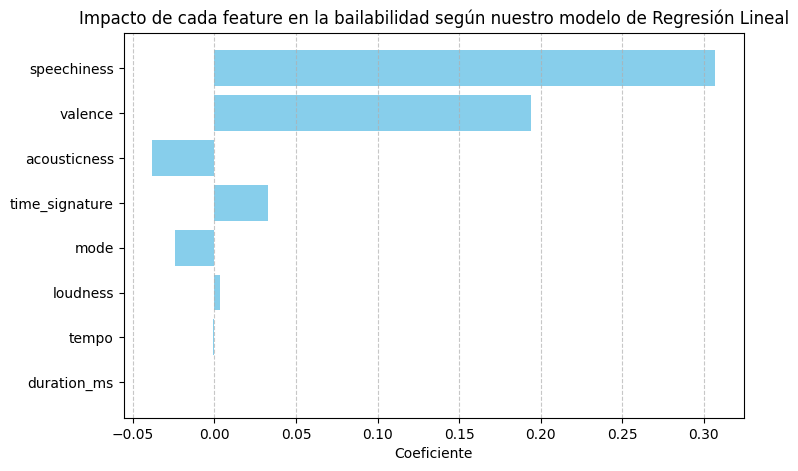

Gráfico 1 - Impacto de cada feature en la bailabilidad según nuestro modelo de Regresión Lineal


In [32]:
import matplotlib.pyplot as plt

# Ordenamos por coeficiente absoluto
coef_df_sorted = coef_df.sort_values(by='AbsCoef', ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(8,5))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Impacto de cada feature en la bailabilidad según nuestro modelo de Regresión Lineal')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
print("Gráfico 1 - Impacto de cada feature en la bailabilidad según nuestro modelo de Regresión Lineal")

Según vemos en el Gráfico 1, nuestro modelo indica que la variable que más influye en la bailabilidad de las canciones es su speechines (o hablabilidad, medida que indica de alguna manera la cantidad de palabras habladas que tiene una canción), seguido por el valence (una medida que indica la positividad musical general (emoción) de una canción. Una valencia alta suena alegre; una valencia baja suena triste o enojada), y por último por la acousticness (una medida de confianza que indica la acusticidad de una canción, adoptando valores entre 0 y 1, siendo 1 una canción acústica y 0 una canción que no lo es).

**A continuación, se realizó también el entrenamiento de un modelo de regresión Random Forest**

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
rf_model = RandomForestRegressor(
    n_estimators=100,  # número de árboles
    random_state=42,   # para reproducibilidad
    max_depth=None,    # dejar que crezca hasta que cada hoja sea pura
    n_jobs=-1          # usar todos los núcleos de tu CPU
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
y_pred_rf = rf_model.predict(X_test)

In [35]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf) # Calculate MSE first -> corregido por Gemini
rmse_rf = np.sqrt(mse_rf) # Calculate RMSE by taking the square root of MSE
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R^2: {r2_rf:.3f}")

MAE: 0.079
RMSE: 0.105
R^2: 0.576


In [36]:
# Guardar importancia de cada feature
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feat_imp_df)


          Feature  Importancia
7    acousticness     0.204563
0           tempo     0.194414
2         valence     0.194062
4     speechiness     0.168557
6     duration_ms     0.120391
1        loudness     0.085266
3  time_signature     0.020639
5            mode     0.012107


Según vemos, para nuestro modelo de Random Forest, la variable que mayor influencia tiene sobre la bailabilidad de la canción es su acusticidad (acousticness), seguido por el tempo y el valence.

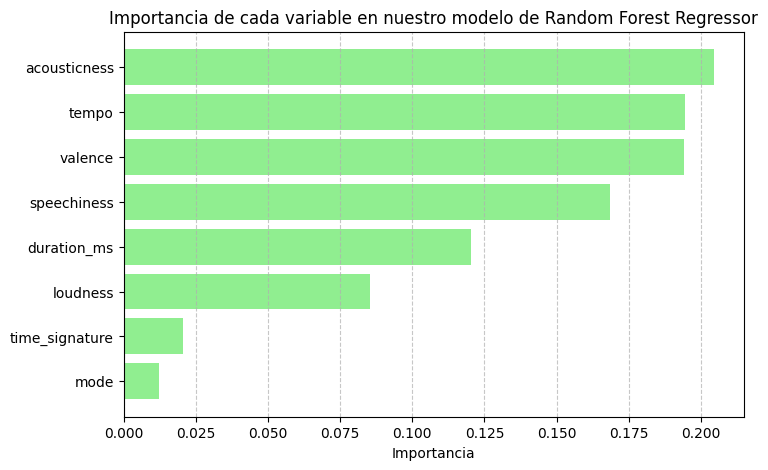

Gráfico 2 - Importancia de cada variable en nuestro modelo de Random Forest Regressor


In [37]:
import matplotlib.pyplot as plt

# Ordenar para gráfico horizontal
feat_imp_df_sorted = feat_imp_df.sort_values(by='Importancia', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df_sorted['Feature'], feat_imp_df_sorted['Importancia'], color='lightgreen')
plt.xlabel('Importancia')
plt.title('Importancia de cada variable en nuestro modelo de Random Forest Regressor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
print("Gráfico 2 - Importancia de cada variable en nuestro modelo de Random Forest Regressor")

El gráfico 2 muestra el nivel de importancia de las diferentes variables en nuestro modelo de Random Forest. Vemos de manera intuitiva como, al igual que se mencionó con anterioridad, la acusticidad, el tempo y el valence son las variables que mayor influencia tienen en nuestro modelo a la hora de predecir la bailabilidad de una canción.

Gráfico de dependencia parcial

Gráfico 3 - Dependencia parcial de la acusticidad (acousticness) en la predicción de la bailabilidad (danceability)


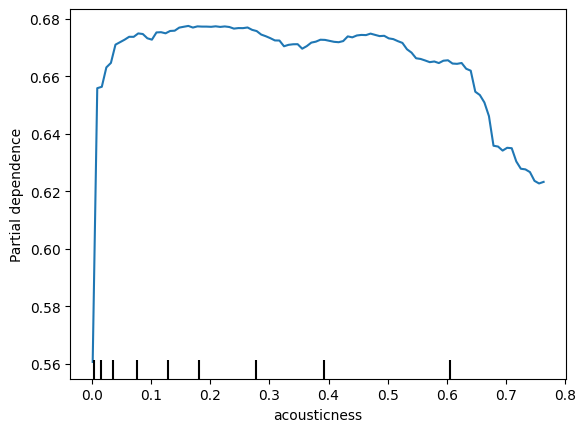

In [38]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf_model, X_test, ['acousticness'])
print("Gráfico 3 - Dependencia parcial de la acusticidad (acousticness) en la predicción de la bailabilidad (danceability)")

En el gráfico 3 se observa que el modelo tiende a catalogar como más bailables a las canciones que poseen menor nivel de acusticidad (acousticness). A partir de valores superiores a 0.5 (es decir, cuando las canciones se vuelven más acústicas) disminuye la predicción de la bailabilidad, lo que sugiere una relación inversa entre ambas variables.

# Conclusión y comparación entre ambos modelos de regresión

Al comparar los resultados obtenidos por ambos modelos, el Random Forest presentó un rendimiento superior al de Regresión Lineal.

Si comparamos las diferentes métricas para cada modelo (MAE, RMSE y R^2) vemos que:

Regresión Lineal
*   MAE: 0.107
*   RMSE: 0.133
*   R^2: 0.310

Random Forest
*   MAE: 0.079
*   RMSE: 0.105
*   R^2: 0.576

Vemos así que tanto el MAE (error medio absoluto) como el RMSE (raíz del error cuadrático medio) fueron menores en el modelo de Random Forest. Por último, el R^2 es mayor para el Random Forest, lo cuál indica un mejor ajuste del modelo en la previsibilidad de la bailabilodad (danceability) de una canción.
